In [1]:
from pandas import read_csv

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Energy Meter.csv to Energy Meter.csv


In [4]:
ds='Energy Meter.csv'
names=['Voltage','Current','Power','Class']
dataset=read_csv(ds,names=names)
dataset

,Voltage,Current,Power,Class
0,0.0000,0.000000,0.000000,NoLoad
1,0.0000,0.000000,0.000000,NoLoad
2,0.0000,0.000000,0.000000,NoLoad
3,0.0000,0.000000,0.000000,NoLoad
4,0.0000,0.000000,0.000000,NoLoad
...,...,...,...,...
395,214.2647,0.847530,181.595761,Risk
396,214.6480,0.850669,182.594400,Risk
397,215.0313,0.850669,182.920461,Risk
398,211.9649,0.850669,180.311970,Risk


In [6]:
print(dataset.describe())
print(dataset.shape)
print(dataset.head(5))
print(dataset.tail(5))
print(dataset.groupby('Class').size())

          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.076849    0.000000
50%    213.114800    0.176985   38.430426
75%    215.031300    0.398765  101.438042
max    304.340200    1.227349  264.859337
(400, 4)
   Voltage  Current  Power   Class
0      0.0      0.0    0.0  NoLoad
1      0.0      0.0    0.0  NoLoad
2      0.0      0.0    0.0  NoLoad
3      0.0      0.0    0.0  NoLoad
4      0.0      0.0    0.0  NoLoad
      Voltage   Current       Power Class
395  214.2647  0.847530  181.595761  Risk
396  214.6480  0.850669  182.594400  Risk
397  215.0313  0.850669  182.920461  Risk
398  211.9649  0.850669  180.311970  Risk
399  215.7979  0.850669  183.572584  Risk
Class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64


In [9]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [ ]:
model.fit()

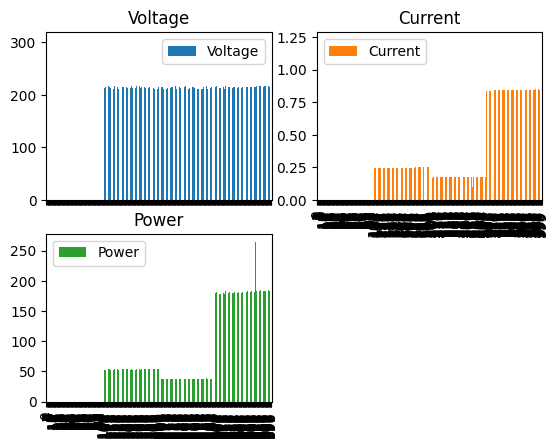

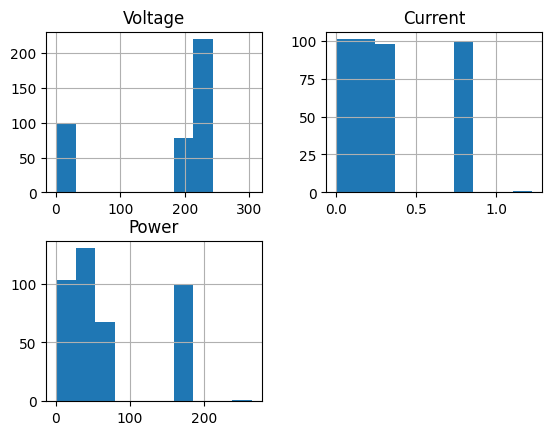

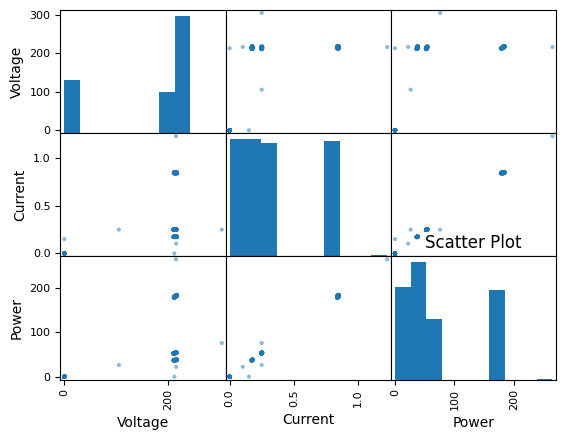

In [14]:
dataset.plot(kind='bar',subplots=True,layout=(2,2))
pyplot.title('Bar Plot')
pyplot.show()
dataset.hist()
pyplot.title('Histogram Plot')
pyplot.show()
scatter_matrix(dataset)
pyplot.title('Scatter Plot')
pyplot.show()

In [15]:
!pip install scikit-learn

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [17]:
array=dataset.values
x=array[:,0:3]
y=array[:,3]
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.20,random_state=1,shuffle=True)

In [19]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR:0.996875 (0.009375)
LDA:0.996875 (0.009375)
KNN:0.993750 (0.012500)
CART:0.996875 (0.009375)
NB:0.993750 (0.012500)
SVM:0.990625 (0.014321)


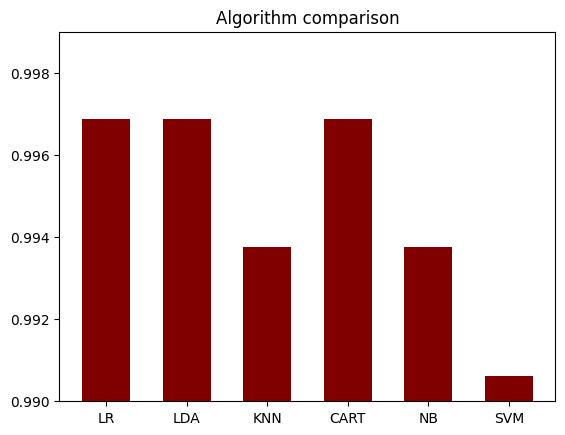

In [20]:
results=[]
names=[]
res=[]
for name,model in models:
  KFold=StratifiedKFold(n_splits=10,random_state=None,shuffle=True)
  cv_results=cross_val_score(model,x_train,y_train,cv=KFold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s:%f (%f)'%(name,cv_results.mean(),cv_results.std()))
pyplot.ylim(.990, .999 )
pyplot.bar(names,res,color='maroon',width=0.6)
pyplot.title('Algorithm comparison')
pyplot.show()